In [1]:
# 데이터 활용에 필요한 기본 패키지 로딩
import sys #access to system parameters 
import pandas as pd
import sklearn #collection of machine learning algorithms
import numpy as np #foundational package for scientific computing
import tensorflow as tf
import keras
import os

Using TensorFlow backend.


In [0]:
#데이터 전처리 관련 라이브러리 로드
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import ShuffleSplit

#HyperParameter Tuning을 위한 라이브러리 로드
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#모델 평가를 위한 라이브러리 로드
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn import model_selection

#수학 & 통계 관련 라이브러리 로드
import scipy.stats as st
from collections import Counter

#Visualization
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Model 관련 라이브러리 로드

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost

# Deep Learning Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation 
from keras.wrappers.scikit_learn import KerasClassifier


In [3]:
# Auth 인증 및 Google Drive 활용 Data load
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# Google Drive 내 Custom Class 경로 지정
import sys
sys.path.insert(0, '/gdrive/My Drive/CustomClasses')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
# !ls /gdrive/My\ Drive/kaggle
!ls /gdrive/My\ Drive/data

crawl-300d-2M.vec  glove.840B.300d.txt	  Study
dogs-vs-cats.zip   joongo.csv		  test.csv
FashionMNIST	   sample_submission.csv  train.csv


# **EDA**

필요한 Package Load 및 학습 데이터 Load

In [0]:
df_joongo = pd.read_csv('/gdrive/My Drive/data/joongo.csv', encoding='utf-8')

In [42]:
# 데이터 정상 Load 확인
display(df_joongo.head())
display(df_joongo.tail())

,NAME,YEAR,KM,PRICE,FUEL
0,아반떼 AD,2016-01-01,99249.0,1050.0,디젤
1,아반떼 AD,2015-12-01,75806.0,1070.0,가솔린
2,아반떼 AD,2016-01-01,22335.0,1080.0,가솔린
3,아반떼 AD,2016-01-01,87339.0,1090.0,디젤
4,아반떼 AD,2016-03-01,77861.0,1090.0,디젤


,NAME,YEAR,KM,PRICE,FUEL
59,미니,2011-03-01,81554.0,1370.0,가솔린
60,미니,2013-01-01,127148.0,1440.0,디젤
61,미니,2014-03-01,67515.0,1770.0,디젤
62,미니,2014-04-01,87454.0,1880.0,디젤
63,미니,2016-04-01,37888.0,1940.0,가솔린


In [8]:
print("IS Null ?? \n", df_joongo.isnull().any()) # Null 값 체크
print("--------- \n joongo null value counts are \n {}".format(df_joongo.isnull().sum())) # Null 값 Counting
print("--------- \n Train total length is ", len(df_joongo)) # 전체 데이터 Set 길이

IS Null ?? 
 NAME     False
YEAR     False
KM       False
PRICE    False
FUEL     False
dtype: bool
--------- 
 joongo null value counts are 
 NAME     0
YEAR     0
KM       0
PRICE    0
FUEL     0
dtype: int64
--------- 
 Train total length is  64


In [9]:
# Unique Value Counting
print('# Col Name: Unique Value / Total Size')
print("-"*25)

for idx, col in enumerate(df_joongo):    
    # Unique Variable Check for which columns can be one hot encoding
    print(col, ':', df_joongo[col].unique().size, '/', len(df_joongo[col]))  

# Col Name: Unique Value / Total Size
-------------------------
NAME : 7 / 64
YEAR : 44 / 64
KM : 64 / 64
PRICE : 55 / 64
FUEL : 2 / 64


In [10]:
# 데이터들의 기초통계량 체크
for col in df_joongo:    
    # dataset 수치형 변수 살펴보기
    dataset_n_cols = [col for col in df_joongo.columns if df_joongo[col].dtype not in ['O']]
    dataset_c_cols = [col for col in df_joongo.columns if df_joongo[col].dtype in ['O']]
    
print('## Description of Numeric Values in','{}'.format('joongo dataframe'))
print(df_joongo[dataset_n_cols].describe())
print("-"*50)
print('## Description of Categorical Values in','{}'.format('joongo dataframe'))
print(df_joongo[dataset_c_cols].describe())

## Description of Numeric Values in joongo dataframe
                  KM        PRICE
count      64.000000    64.000000
mean    70446.078125  1431.093750
std     35005.054878   675.571756
min     11705.000000   580.000000
25%     39473.500000  1047.500000
50%     74433.500000  1325.000000
75%     95010.000000  1635.000000
max    137925.000000  4190.000000
--------------------------------------------------
## Description of Categorical Values in joongo dataframe
          NAME        YEAR FUEL
count       64          64   64
unique       7          44    2
top     아반떼 AD  2016-01-01   디젤
freq        16           5   34


### Feature Engineering

In [0]:
# Object 형의 데이터들을 Numeric 형태로 변경
# Date는 각각 Year, Month, Day로 나누어 String형태로 변경
df_joongo['yearmon'] = df_joongo['YEAR'].apply(lambda x: int(x[:4]+x[5:7]))

In [81]:
# 명목형 변수들을 onehot encoding
df_onehot = pd.get_dummies(df_joongo, columns=['NAME', 'FUEL']) 
df_onehot.drop(['YEAR'], axis=1, inplace=True)
display(df_onehot.head())
display(df_onehot.tail())
display(df_onehot.info())

,KM,PRICE,yearmon,NAME_BMW3,NAME_BMW5,NAME_미니,NAME_벤츠C,NAME_아반떼 AD,NAME_아반떼 전버전,NAME_투싼,FUEL_가솔린,FUEL_디젤
0,99249.0,1050.0,201601,0,0,0,0,1,0,0,0,1
1,75806.0,1070.0,201512,0,0,0,0,1,0,0,1,0
2,22335.0,1080.0,201601,0,0,0,0,1,0,0,1,0
3,87339.0,1090.0,201601,0,0,0,0,1,0,0,0,1
4,77861.0,1090.0,201603,0,0,0,0,1,0,0,0,1


,KM,PRICE,yearmon,NAME_BMW3,NAME_BMW5,NAME_미니,NAME_벤츠C,NAME_아반떼 AD,NAME_아반떼 전버전,NAME_투싼,FUEL_가솔린,FUEL_디젤
59,81554.0,1370.0,201103,0,0,1,0,0,0,0,1,0
60,127148.0,1440.0,201301,0,0,1,0,0,0,0,0,1
61,67515.0,1770.0,201403,0,0,1,0,0,0,0,0,1
62,87454.0,1880.0,201404,0,0,1,0,0,0,0,0,1
63,37888.0,1940.0,201604,0,0,1,0,0,0,0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 12 columns):
KM              64 non-null float64
PRICE           64 non-null float64
yearmon         64 non-null int64
NAME_BMW3       64 non-null uint8
NAME_BMW5       64 non-null uint8
NAME_미니         64 non-null uint8
NAME_벤츠C        64 non-null uint8
NAME_아반떼 AD     64 non-null uint8
NAME_아반떼 전버전    64 non-null uint8
NAME_투싼         64 non-null uint8
FUEL_가솔린        64 non-null uint8
FUEL_디젤         64 non-null uint8
dtypes: float64(2), int64(1), uint8(9)
memory usage: 2.1 KB


None

In [52]:
# 한글 글꼴 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 우선 fm._rebuild() 를 해주고
fm._rebuild()

NanumGothic Eco


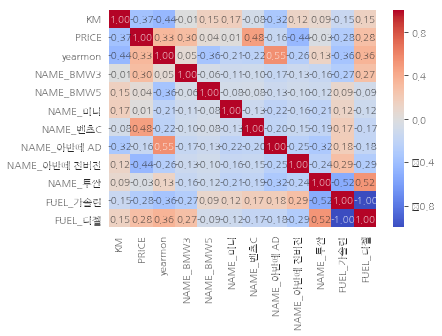

In [82]:
# 데이터 간의 상관관계 체크
  # 수치형변수들과 Survived 변수의 상관관계 Matrix 시각화
  g = sns.heatmap(df_onehot.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

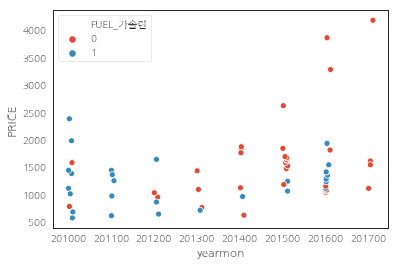

In [85]:
ax = sns.scatterplot(x="yearmon", y="PRICE", hue="FUEL_가솔린", data=df_onehot)

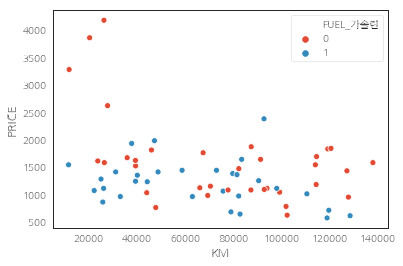

In [86]:
ax = sns.scatterplot(x="KM", y="PRICE", hue="FUEL_가솔린", data=df_onehot)

In [101]:
# Data Preparation To Model Fit
target_col = ['PRICE']
train_col = [col for col in df_onehot.columns if col not in ['PRICE']]
print(train_col)
train_x, test_x, train_y, test_y = model_selection.train_test_split(df_onehot[train_col], df_onehot[target_col], random_state = 42)

['KM', 'yearmon', 'NAME_BMW3', 'NAME_BMW5', 'NAME_미니', 'NAME_벤츠C', 'NAME_아반떼 AD', 'NAME_아반떼 전버전', 'NAME_투싼', 'FUEL_가솔린', 'FUEL_디젤']


In [0]:
num_attribs = train_col

num_pipeline = Pipeline([
        ('minmax_scaler', MinMaxScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num_pipeline", num_pipeline, num_attribs),
    ])

In [0]:
train_x = full_pipeline.fit_transform(train_x)
test_x = full_pipeline.fit_transform(test_x)

## 기본 모델 테스트

### Linear Regression

In [174]:
# Linear Regression 기본 모델
lr_model = LinearRegression()

# CrossValidation 실행
lr_cv_score_pram = ['neg_mean_absolute_error', 'r2', 'explained_variance']
lr_cv_results = cross_validate(lr_model, train_x, train_y, cv=5, scoring=lr_cv_score_pram, return_train_score=True)

print('************ neg_mean_absolute_error ************')
print(lr_cv_results['train_neg_mean_absolute_error'], lr_cv_results['train_neg_mean_absolute_error'].mean())
print(lr_cv_results['test_neg_mean_absolute_error'], lr_cv_results['test_neg_mean_absolute_error'].mean())

print('************ r2 ************')
print(lr_cv_results['train_r2'], lin_cv_results['train_r2'].mean())
print(lr_cv_results['test_r2'], lin_cv_results['test_r2'].mean())

print('************ explained_variance ************')
print(lr_cv_results['train_explained_variance'], lr_cv_results['train_explained_variance'].mean())
print(lr_cv_results['test_explained_variance'], lr_cv_results['test_explained_variance'].mean())

# Test Set 검증
lr_model.fit(train_x, train_y)
lr_y_pred = lr_model.predict(test_x)
print('************ Final Test Result ************')
print("Linear Regression r2 is : {:.2f}, mean squared error is : {:.2f}".format(metrics.r2_score(test_y, lr_y_pred), metrics.mean_squared_error(test_y, lr_y_pred)))

************ neg_mean_absolute_error ************
[-216.43473386 -215.00685148 -213.24939652 -221.32153829 -217.09279366] -216.62106276492577
[-239.10398414 -281.95535315 -303.03458769 -248.8320188  -292.72530584] -273.1302499210323
************ r2 ************
[0.8222742  0.84434324 0.85715005 0.87302676 0.87583797] 0.854526444714175
[0.86024115 0.82051688 0.74343045 0.35362256 0.1200208 ] 0.5795663685641712
************ explained_variance ************
[0.8222742  0.84434324 0.85715005 0.87302676 0.87583797] 0.8545264447141753
[0.86037928 0.82109502 0.7622356  0.37071696 0.1312426 ] 0.589133892187172
************ Final Test Result ************
Linear Regression r2 is : 0.64, mean squared error is : 96924.24


In [171]:
# XGBoost 기본 모델
xgr_model = xgboost.XGBRegressor()
xgr_score_pram = ['neg_mean_absolute_error', 'r2', 'explained_variance']
xgr_cv_results = cross_validate(xgr_model, train_x, train_y, cv=5, scoring=xgr_score_pram, return_train_score=True)

print('************ neg_mean_absolute_error ************')
print(xgr_cv_results['train_neg_mean_absolute_error'], xgr_cv_results['train_neg_mean_absolute_error'].mean())
print(xgr_cv_results['test_neg_mean_absolute_error'], xgr_cv_results['test_neg_mean_absolute_error'].mean())

print('************ r2 ************')
print(xgr_cv_results['train_r2'], xgr_cv_results['train_r2'].mean())
print(xgr_cv_results['test_r2'], xgr_cv_results['test_r2'].mean())

print('************ explained_variance ************')
print(xgr_cv_results['train_explained_variance'], xgr_cv_results['train_explained_variance'].mean())
print(xgr_cv_results['test_explained_variance'], xgr_cv_results['test_explained_variance'].mean())

# Test Set 검증
xgr_model.fit(train_x, train_y)
xgr_y_pred = xgr_model.predict(test_x)
print('************ Final Test Result ************')
print("XGBoost Regression r2 is : {:.2f}, mean squared error is : {:.2f}".format(metrics.r2_score(test_y, xgr_y_pred), metrics.mean_squared_error(test_y, xgr_y_pred)))

# CV Result 상 Overfitting 됨 - GridSearch를 통해 제약조건 추가 필요 

[07:01:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:01:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:01:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:01:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:01:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
************ neg_mean_absolute_error ************
[-32.63488448 -28.23062134 -33.55065597 -27.61829396 -35.96634615] -31.600160379963206
[-309.57816162 -591.20976563 -348.80910034 -326.60270182 -162.86770291] -347.8134864637587
************ r2 ************
[0.99523151 0.99718672 0.99608759 0.99762383 0.99614818] 0.9964555690496818
[0.51081968 0.03960009 0.4337527

In [172]:
# Decision Tree 기본 모델
dtr_model = DecisionTreeRegressor()

dtr_score_pram = ['neg_mean_absolute_error', 'r2', 'explained_variance']
dtr_cv_results = cross_validate(dtr_model, train_x, train_y, cv=5, scoring=dtr_score_pram, return_train_score=True)

print('************ neg_mean_absolute_error ************')
print(dtr_cv_results['train_neg_mean_absolute_error'], dtr_cv_results['train_neg_mean_absolute_error'].mean())
print(dtr_cv_results['test_neg_mean_absolute_error'], dtr_cv_results['test_neg_mean_absolute_error'].mean())

print('************ r2 ************')
print(dtr_cv_results['train_r2'], dtr_cv_results['train_r2'].mean())
print(dtr_cv_results['test_r2'], dtr_cv_results['test_r2'].mean())

print('************ explained_variance ************')
print(dtr_cv_results['train_explained_variance'], dtr_cv_results['train_explained_variance'].mean())
print(dtr_cv_results['test_explained_variance'], dtr_cv_results['test_explained_variance'].mean())

# Test Set 검증
dtr_model.fit(train_x, train_y)
dtr_y_pred = dtr_model.predict(test_x)
print("DecisionTree Regression r2 is : {:.2f}, mean squared error is : {:.2f}".format(metrics.r2_score(test_y, dtr_y_pred), metrics.mean_squared_error(test_y, dtr_y_pred)))

# CrossValidtion 결과 모델 학습이 되지 않음

************ neg_mean_absolute_error ************
[-0. -0. -0. -0. -0.] 0.0
[-395.         -670.         -516.         -577.77777778 -347.77777778] -501.31111111111113
************ r2 ************
[1. 1. 1. 1. 1.] 1.0
[ 0.26353606 -0.51535036  0.08957066 -5.26356122 -1.67812645] -1.4207862636685278
************ explained_variance ************
[1. 1. 1. 1. 1.] 1.0
[ 0.36754209 -0.46739708  0.09119449 -5.17880359 -1.61233305] -1.359959425914795
DecisionTree Regression r2 is : -0.02, mean squared error is : 278368.75


In [173]:
# RandomForest 기본 모델
rfr_model = RandomForestRegressor()

rfr_score_pram = ['neg_mean_absolute_error', 'r2', 'explained_variance']
rfr_cv_results = cross_validate(rfr_model, train_x, train_y, cv=5, scoring=rfr_score_pram, return_train_score=True)

print('************ neg_mean_absolute_error ************')
print(rfr_cv_results['train_neg_mean_absolute_error'], rfr_cv_results['train_neg_mean_absolute_error'].mean())
print(rfr_cv_results['test_neg_mean_absolute_error'], rfr_cv_results['test_neg_mean_absolute_error'].mean())

print('************ r2 ************')
print(rfr_cv_results['train_r2'], rfr_cv_results['train_r2'].mean())
print(rfr_cv_results['test_r2'], rfr_cv_results['test_r2'].mean())

print('************ explained_variance ************')
print(rfr_cv_results['train_explained_variance'], rfr_cv_results['train_explained_variance'].mean())
print(rfr_cv_results['test_explained_variance'], rfr_cv_results['test_explained_variance'].mean())

# Test Set 검증
rfr_model.fit(train_x, train_y)
rfr_y_pred = rfr_model.predict(test_x)
print("RandomForest Regression r2 is : {:.2f}, mean squared error is : {:.2f}".format(metrics.r2_score(test_y, rfr_y_pred), metrics.mean_squared_error(test_y, rfr_y_pred)))

# CV Result 상 과적합 됨 - GridSearch를 통해 제약조건 추가 필요 

************ neg_mean_absolute_error ************
[-123.05263158 -119.81578947 -140.34210526 -181.46153846 -164.02564103] -145.73954116059377
[-364.3        -659.6        -250.5        -331.44444444 -352.66666667] -391.70222222222225
************ r2 ************
[0.85844634 0.87655714 0.86220377 0.84224771 0.86652251] 0.8611954937054522
[ 0.34712804 -0.049911    0.74815226  0.21585703 -0.57503588] 0.13723808909494067
************ explained_variance ************
[0.85851727 0.87796135 0.86238912 0.84478207 0.86737128] 0.8622042170164569
[ 0.40625387  0.03933344  0.75949833  0.21587728 -0.42365539] 0.19946150373050647
RandomForest Regression r2 is : -0.70, mean squared error is : 462551.75


### GridSearchCV 실행 최적값 찾기

In [175]:
# XGBoost GridSearch를 위한 Parameter Search
xgr_params = {'colsample_bytree':[i/10.0 for i in range(6,11)], 'gamma':[i/10.0 for i in range(3,6)],'max_depth': [2,3,4], 
          'min_child_weight':[4,5], 'objective':['reg:squarederror'], 'subsample':[i/10.0 for i in range(6,11)]}

# Initialize XGB and GridSearch
xgr = xgboost.XGBRegressor(nthread=-1) 

xgr_grid = GridSearchCV(xgr, xgr_params)
xgr_grid.fit(train_x, train_y)

print(xgr_grid.best_estimator_)

# Print the r2 score
print(metrics.r2_score(test_y, xgr_grid.best_estimator_.predict(test_x))) 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimators=100,
             n_jobs=1, nthread=-1, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)
0.770424693849864


In [178]:
# Random Forest GridSearch를 위한 Parameter Search

rfr_param_grid = { "n_estimators": [10,20,30], "max_features" : ["auto", "sqrt", "log2"], "min_samples_split" : [2,4,8], "bootstrap": [True, False], }


# Initialize RandomForest and GridSearch
rfr = RandomForestRegressor() 

rfr_grid = GridSearchCV(rfr, rfr_param_grid)
rfr_grid.fit(train_x, train_y)

print(rfr_grid.best_estimator_)

# Print the r2 score
print(metrics.r2_score(test_y, rfr_grid.best_estimator_.predict(test_x))) 

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
0.2010435326359179
